<img src="https://www.simplilearn.com/ice9/new_logo.svgz">

## Mercedes Benz Greener Manufacturing 

### Type : Regression

#### Problem Statement : Reduce the time a Mercedes-Benz spends on the test bench.


##### Following actions should be performed:

* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).


* Check for null and unique values for test and train sets.


* Apply label encoder.


* Perform dimensionality reduction.


* Predict your test_df values using XGBoost.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Import Dataset

In [2]:
df = pd.read_csv('mercbenz/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### Exploratory Data Analysis

In [5]:
y = df['y'].values

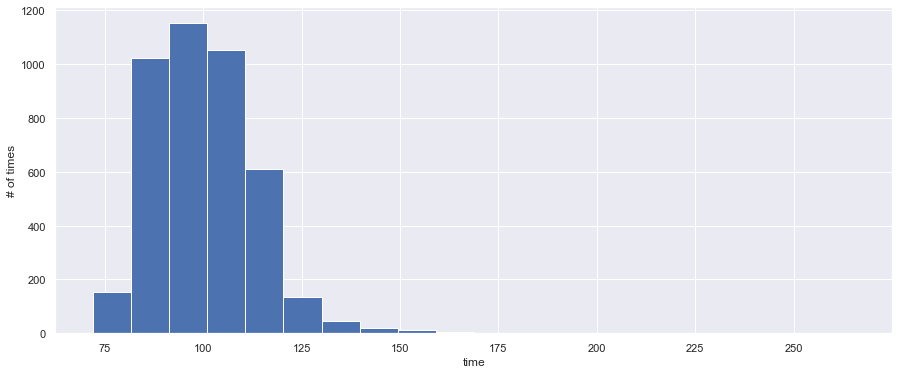

In [6]:
plt.figure(figsize=(15,6))
plt.hist(y,bins=20)
plt.xlabel('time')
plt.ylabel('# of times');

1. Distribution of output variable is pretty much centered around the mean.


2. Target variable has some outliers on the right side.

### Checking whether things are changing over time

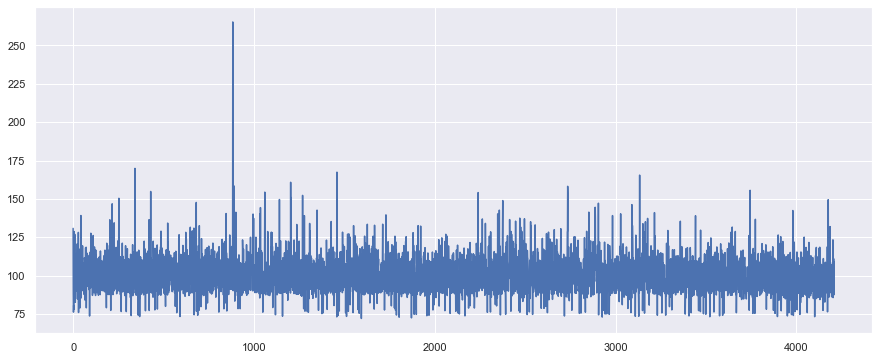

In [7]:
plt.figure(figsize=(15,6))
plt.plot(y);

* Data is stationary
* No seasonality / pattern

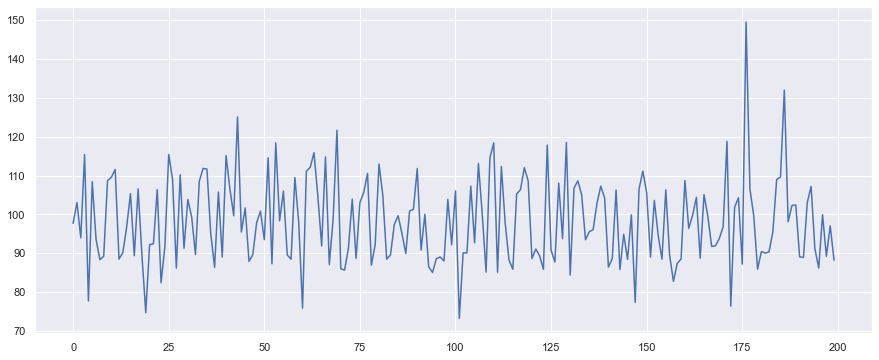

In [8]:
plt.figure(figsize=(15,6))
plt.plot(y[4000:4200]);

### Feature Analysis

In [9]:
cols = [c for c in df.columns if 'X' in c]

print(f'Number of features : {len(cols)}')

print(f'\n\nFeature Types :\n{df[cols].dtypes.value_counts()}')

Number of features : 376


Feature Types :
int64     368
object      8
dtype: int64


### Find Cardinality

1. Create a list of 3 lists. call it cnt


2. Iterate over columns


3. In iterator:

    a. find type of all columns

    b. find # of unique values in each column

    c. If uniqval = 1, assign in cnt[0], if 2 assign in cnt[1], else assign in cnt[2]

In [10]:
cnt = [[],[],[]]

for c in cols:
    typ = df[c].dtype
    
    uniq = len(np.unique(df[c]))
    
    if uniq==1: cnt[0].append(c)
    elif uniq==2 and typ == np.int64: cnt[1].append(c)
    else: cnt[2].append(c)
        
print(f'Constant Features {cnt[0]}\n\nBinary Features {cnt[1]}\n\nCategorical Features {cnt[2]}')

Constant Features ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

Binary Features ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X1

### Modeling w XGBoost

In [11]:
dft = pd.read_csv('mercbenz/test.csv')

features = list(set(df.columns)-set(['ID','y']))

X_train = df[features]
y_train = df['y'].values

X_test = dft[features]
id_test = df['ID'].values

for col in features:
    cardinality = len(np.unique(X_train[col]))
    
    # Dropping the contant columns
    if cardinality==1:
        X_train.drop(col,axis=1)
        X_test.drop(col,axis=1)
    
    # Label Encoding using ord
    if cardinality>2:
        mapper = lambda x: sum(ord(digit) for digit in x)
        X_train[col] = X_train[col].apply(mapper)
        X_test[col] = X_test[col].apply(mapper)

<ipython-input-11-e17cf47efda5>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].apply(mapper)
<ipython-input-11-e17cf47efda5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].apply(mapper)


In [12]:
ord('V')

86

In [13]:
X_train[cnt[2]].head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,107,118,213,97,100,117,106,111
1,107,116,215,101,100,121,108,111
2,219,119,110,99,100,120,106,120
3,219,116,110,102,100,120,108,101
4,219,118,110,102,100,104,100,110


### XGBoost

In [14]:
import xgboost as xgb

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

d_train = xgb.DMatrix(X_train,label=y_train)
d_valid = xgb.DMatrix(X_valid,label=y_valid)
d_test = xgb.DMatrix(X_test)

params = {}

params['Objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

watchlist = [(d_train,'Train'),(d_valid,'Validation')]

clf = xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,
                feval=xgb_r2score,maximize=True,verbose_eval=10)

[11:00:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { Objective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Train-rmse:98.98857	Validation-rmse:98.87984	Train-r2:-59.48709	Validation-r2:-61.81546
Multiple eval metrics have been passed: 'Validation-r2' will be used for early stopping.

Will train until Validation-r2 hasn't improved in 50 rounds.
[10]	Train-rmse:81.05273	Validation-rmse:80.98148	Train-r2:-39.55346	Validation-r2:-41.13300
[20]	Train-rmse:66.42594	Validation-rmse:66.38054	Train-r2:-26.23755	Validation-r2:-27.30953
[30]	Train-rmse:54.51055	Validation-rmse:54.48060	Train-r2:-17.34230	Validation-r2:-18.06930
[40]	Train-rmse:44.81946	Validation-rmse:44.79546	Train-r2:-11.40012	Validation-r2:-11.89197
[50]	Train-rmse:36.95561	V

### Predictions

In [15]:
p_test = clf.predict(d_test)
pred = pd.DataFrame()
pred['ID'] = id_test
pred['y'] = p_test

In [16]:
pred.head()

,ID,y
0,0,88.515915
1,6,104.233536
2,7,88.972939
3,9,76.732613
4,13,111.140244


In [17]:
X_train.shape

(3367, 376)

# HW

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)

pca_results = pca.fit_transform(X_train)

pca_results

array([[-2.91530891e+01, -2.06038680e+01,  6.58533876e+01, ...,
        -4.71621248e-02,  3.29466587e-01, -3.27979239e-01],
       [-2.80095456e+01, -2.02119243e+01,  6.35527025e+01, ...,
        -9.16075471e-02,  8.43251985e-02, -6.91731515e-01],
       [-7.59692216e+00,  8.96430275e+01, -5.61374983e+00, ...,
         7.60714477e-01,  5.46276046e-01,  3.30565239e-01],
       ...,
       [-3.22307774e+01,  8.22995298e-01, -1.99959347e+01, ...,
        -1.95021064e-01, -6.50352693e-01,  1.03805516e-01],
       [-3.23866925e+01, -4.51574109e+00, -1.57764048e+01, ...,
        -5.27145301e-01,  4.04216880e-02,  2.36571008e-01],
       [ 3.14220653e+01, -5.86325772e+01,  4.65509801e+01, ...,
         1.90757731e-01,  7.19232063e-01, -1.73319841e-01]])

# Great Job !